# Reproducing "Robust Counterfactual Explanations on Graph Neural Networks"
This notebook represents our reproduction study where this notebook serves as a high-level interface.

In [7]:
from explainer_main import main
from argparse import ArgumentParser
import json
import os
import gdown

os.environ["WANDB_MODE"] = "offline"  # Use wandb logging in offline mode

# Create empty saved_models directory
!rm -r saved_models
!mkdir saved_models

In [8]:
SEEDS = [0, 1, 3, 5, 8, 10, 15, 42, 69, 101][:2]  # All seeds during training and evaluating
SPARSITIES = [0.8, 1.0]  # Different train/tests splits: 0.8 represents 80/20 split; and 1.0 represents 100/100 split

# Create namespace with used hyperparameters
parser = ArgumentParser()
prog_args = parser.parse_args('')

with open('commandline_args.txt', 'r') as f:
    prog_args.__dict__ = json.load(f)

## Training
In this part we train multiple models on Mutagenicity and MNISTSuperPixel datasets.
Also you can download the pretrained versions instead below.

In [9]:
TRAIN = True  # Set to False if you want to download our trained explainers on Mutagenicity. Set to True to train from scratch.

In [10]:
if TRAIN is False:
    # Download pretrained models
    url = 'https://drive.google.com/uc?id=1G1cwd6XhQNzoe6_J0w162KrXwBxiciO6'
    gdown.download(url, quiet=False, use_cookies=False)
    !unzip models.zip -d ./saved_models/
    !mv ./saved_models/models/* ./saved_models/
    !rm -r ./saved_models/models
    !rm -r ./saved_models/__MACOSX
    !rm models.zip

In [11]:
def train(args):
    if TRAIN is False:
        return
    
    for sparsity in SPARSITIES:
        args.train_data_sparsity = sparsity  # Set train/test split for all seeds
        for seed in SEEDS:
            args.seed = seed  # Set seed for training iteration
            main(args)

### RCExplainer

In [12]:
# Train from scratch
prog_args.num_epochs = 1
prog_args.bmname = "Mutagenicity"  # Dataset used for training
prog_args.explainer_method = "rcexplainer"  # Explainer model to train
prog_args.prefix = "rcexp_mutag"  # Used for storing models and logging training

train(prog_args)

CUDA 1
loading model
./ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar
=> loading checkpoint './ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar'
Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
Val data in rceplainer: 100
Val data in rceplainer: 100
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<27:54,  1.19it/s]


log dir already exists and will be overwritten


  0%|          | 0/1 [00:00<?, ?it/s]

Training


100%|██████████| 1/1 [00:29<00:00, 29.50s/it]

epoch:  0 ; loss:  3.796980857849121
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.007178750897343862 0.3137114142139268   0.22972002871500358
 0.2024407753050969   0.16295764536970567  0.1249102656137832
 0.06963388370423547  0.                   0.                  ]
 Edge fidelity confidence change: [-6.3789380897486370e-02  2.4413302162099210e-01  1.7219402784934937e-01
  1.4559421424632951e-01  1.1295860304048570e-01  8.3428643114346016e-02
  3.6888968255651654e-02  7.0485808570352462e-07  0.0000000000000000e+00] for sparsity [0.                 0.5099978587735239 0.7647712698362752
 0.8240487540872167 0.8695437790503711 0.9228434396235102
 0.9700643117275498 0.9999450406237463 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5099978587735239,0.7647712698362752,0.8240487540872167,0.8695437790503711,0.9228434396235102,0.9700643117275498,0.9999450406237463,1.0,
Fidelity, -0.06378938089748637,0.2441330216209921,0.17219402784934937,0.1455942142463295,0.1

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
Val data in rceplainer: 100
Val data in rceplainer: 100
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<27:33,  1.21it/s]


log dir already exists and will be overwritten


epoch,▁
flips,▁
inv_diff,▁
inv_flips,▁
loss,▁
loss_ep,▁
lr,▁
pos_diff,▁
topk_inv_diff,▁
topk_inv_flips,▁
variance_epoch,▁


  0%|          | 0/1 [00:00<?, ?it/s]

Training


100%|██████████| 1/1 [00:29<00:00, 29.11s/it]

epoch:  0 ; loss:  4.275579452514648
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.007896625987078248 0.3015075376884422   0.22541277817659727
 0.20100502512562815  0.17013639626704954  0.13711414213926776
 0.07609475951184494  0.                   0.                  ]
 Edge fidelity confidence change: [-6.0930204365806276e-02  2.3340775037273948e-01  1.7535323210525924e-01
  1.4892916709762294e-01  1.2242058595563556e-01  9.2073819445605248e-02
  4.3853389515092885e-02  1.0588326560278548e-04  0.0000000000000000e+00] for sparsity [0.                 0.5104066198537954 0.7650119616073067
 0.8242900831957815 0.8691609163808035 0.9231379596945714
 0.9699539102758338 0.9999449761411909 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5104066198537954,0.7650119616073067,0.8242900831957815,0.8691609163808035,0.9231379596945714,0.9699539102758338,0.9999449761411909,1.0,
Fidelity, -0.060930204365806276,0.23340775037273948,0.17535323210525924,0.14892916709762294

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
Val data in rceplainer: 100
Val data in rceplainer: 100
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<27:32,  1.21it/s]


log dir already exists and will be overwritten


epoch,▁
flips,▁
inv_diff,▁
inv_flips,▁
loss,▁
loss_ep,▁
lr,▁
pos_diff,▁
topk_inv_diff,▁
topk_inv_flips,▁
variance_epoch,▁


  0%|          | 0/1 [00:00<?, ?it/s]

Training


100%|██████████| 1/1 [00:36<00:00, 36.97s/it]

epoch:  0 ; loss:  3.767800807952881
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.007462686567164179 0.3071182548794489   0.21871412169919632
 0.19804822043628015  0.1796785304247991   0.14580941446613088
 0.07003444316877153  0.                   0.                  ]
 Edge fidelity confidence change: [-6.2634753612919050e-02  2.4137887769260033e-01  1.6991530165469743e-01
  1.4846377871956262e-01  1.2699135559708324e-01  9.1126898553834032e-02
  3.8032577827521501e-02  2.8009426990688601e-05  0.0000000000000000e+00] for sparsity [0.                 0.5102561030678032 0.7650065542841341
 0.8243619546756131 0.8695312275815366 0.9232599955612428
 0.970070363767659  0.9999450645340022 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5102561030678032,0.7650065542841341,0.8243619546756131,0.8695312275815366,0.9232599955612428,0.970070363767659,0.9999450645340022,1.0,
Fidelity, -0.06263475361291905,0.24137887769260033,0.16991530165469743,0.14846377871956262,0

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
Val data in rceplainer: 100
Val data in rceplainer: 100
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<28:08,  1.18it/s]


log dir already exists and will be overwritten


epoch,▁
flips,▁
inv_diff,▁
inv_flips,▁
loss,▁
loss_ep,▁
lr,▁
pos_diff,▁
topk_inv_diff,▁
topk_inv_flips,▁
variance_epoch,▁


  0%|          | 0/1 [00:00<?, ?it/s]

Training


100%|██████████| 1/1 [00:37<00:00, 37.11s/it]

epoch:  0 ; loss:  4.474911212921143
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.007462686567164179 0.3140068886337543   0.22388059701492538
 0.18312284730195177  0.1624569460390356   0.1285878300803674
 0.08323765786452354  0.                   0.                  ]
 Edge fidelity confidence change: [-6.2634753612919050e-02  2.4951598361288502e-01  1.6944381476611961e-01
  1.3395002739232389e-01  1.1463639880910122e-01  8.7587103880642475e-02
  4.9482363493242712e-02  6.8185284271853383e-05  0.0000000000000000e+00] for sparsity [0.                 0.5102561030678032 0.7650065542841341
 0.8243619546756131 0.8695312275815366 0.9232599955612428
 0.970070363767659  0.9999450645340022 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5102561030678032,0.7650065542841341,0.8243619546756131,0.8695312275815366,0.9232599955612428,0.970070363767659,0.9999450645340022,1.0,
Fidelity, -0.06263475361291905,0.24951598361288502,0.1694438147661196,0.1339500273923239,0.11

### RCExplainer NoLDB

In [13]:
prog_args.num_epochs = 1
prog_args.bmname = "Mutagenicity"  # Dataset used for training
prog_args.explainer_method = "rcexp_noldb"  # Explainer model to train
prog_args.prefix = "rcexp_noldb_mutag"  # Used for storing models and logging training

train(prog_args)

CUDA 1
loading model
./ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar
=> loading checkpoint './ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar'
Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<28:08,  1.18it/s]


log dir already exists and will be overwritten


100%|██████████| 1/1 [00:27<00:00, 27.45s/it]

epoch:  0 ; loss:  4.697112560272217
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.007178750897343862 0.30868628858578606  0.22684852835606603
 0.19669777458722182  0.16008614501076812  0.12275664034458005
 0.06891600861450108  0.                   0.                  ]
 Edge fidelity confidence change: [-6.3789380897486370e-02  2.3995692588319389e-01  1.7021925371923810e-01
  1.4084205609042269e-01  1.1021960690906385e-01  8.0899513953038460e-02
  3.6347527107744020e-02  7.0485808570352462e-07  0.0000000000000000e+00] for sparsity [0.                 0.5099978587735239 0.7647712698362752
 0.8240487540872167 0.8695437790503711 0.9228434396235102
 0.9700643117275498 0.9999450406237463 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5099978587735239,0.7647712698362752,0.8240487540872167,0.8695437790503711,0.9228434396235102,0.9700643117275498,0.9999450406237463,1.0,
Fidelity, -0.06378938089748637,0.2399569258831939,0.1702192537192381,0.1408420560904227,0.1

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<27:17,  1.22it/s]


log dir already exists and will be overwritten


100%|██████████| 1/1 [00:27<00:00, 27.30s/it]

epoch:  0 ; loss:  5.3164448738098145
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.007896625987078248 0.3022254127781766   0.22469490308686288
 0.2024407753050969   0.16941852117731515  0.13926776740847094
 0.07537688442211055  0.                   0.                  ]
 Edge fidelity confidence change: [-6.0930204365806276e-02  2.3452261045350500e-01  1.7557253875239495e-01
  1.4915211095453934e-01  1.2226784394015019e-01  9.3110451895986976e-02
  4.4089645083140575e-02  1.0588326560278548e-04  0.0000000000000000e+00] for sparsity [0.                 0.5104066198537954 0.7650119616073067
 0.8242900831957815 0.8691609163808035 0.9231379596945714
 0.9699539102758338 0.9999449761411909 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5104066198537954,0.7650119616073067,0.8242900831957815,0.8691609163808035,0.9231379596945714,0.9699539102758338,0.9999449761411909,1.0,
Fidelity, -0.060930204365806276,0.234522610453505,0.17557253875239495,0.14915211095453934,

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<27:18,  1.22it/s]


log dir already exists and will be overwritten


100%|██████████| 1/1 [00:34<00:00, 34.59s/it]

epoch:  0 ; loss:  4.6866774559021
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.007462686567164179 0.30884041331802525  0.21756601607347875
 0.19690011481056258  0.182548794489093    0.14695752009184845
 0.07003444316877153  0.                   0.                  ]
 Edge fidelity confidence change: [-6.2634753612919050e-02  2.4183269580729930e-01  1.6970234024675240e-01
  1.4963951953243032e-01  1.2757697958075767e-01  9.1874955510709913e-02
  3.7334971942529341e-02  2.8009426990688601e-05  0.0000000000000000e+00] for sparsity [0.                 0.5102561030678032 0.7650065542841341
 0.8243619546756131 0.8695312275815366 0.9232599955612428
 0.970070363767659  0.9999450645340022 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5102561030678032,0.7650065542841341,0.8243619546756131,0.8695312275815366,0.9232599955612428,0.970070363767659,0.9999450645340022,1.0,
Fidelity, -0.06263475361291905,0.2418326958072993,0.1697023402467524,0.14963951953243032,0.127

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
No rule file found, extracting a new one.


  0%|          | 2/2000 [00:01<27:03,  1.23it/s]


log dir already exists and will be overwritten


100%|██████████| 1/1 [00:34<00:00, 34.63s/it]

epoch:  0 ; loss:  202.66009521484375
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.007462686567164179 0.30424799081515497  0.22043628013777267
 0.17853042479908152  0.15614236509758897  0.12743972445464982
 0.08381171067738231  0.                   0.                  ]
 Edge fidelity confidence change: [-6.2634753612919050e-02  2.4263515255823476e-01  1.6725601380782890e-01
  1.2903290314666166e-01  1.0924195839534807e-01  8.5395380033417498e-02
  4.9163036279371769e-02  6.8185284271853383e-05  0.0000000000000000e+00] for sparsity [0.                 0.5102561030678032 0.7650065542841341
 0.8243619546756131 0.8695312275815366 0.9232599955612428
 0.970070363767659  0.9999450645340022 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5102561030678032,0.7650065542841341,0.8243619546756131,0.8695312275815366,0.9232599955612428,0.970070363767659,0.9999450645340022,1.0,
Fidelity, -0.06263475361291905,0.24263515255823476,0.1672560138078289,0.12903290314666166,0

### PGExplainer

In [14]:
prog_args.num_epochs = 1
prog_args.bmname = "Mutagenicity"  # Dataset used for training
prog_args.explainer_method = "pgexplainer"  # Explainer model to train
prog_args.prefix = "pgexplainer_mutag"  # Used for storing models and logging training

train(prog_args)

CUDA 1
loading model
./ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar
=> loading checkpoint './ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar'
Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
log dir already exists and will be overwritten


100%|██████████| 1/1 [00:25<00:00, 25.04s/it]

epoch:  0 ; loss:  12432.9990234375
Average mask density: 0.5052630085219936
Variance:  0.048499137611563575
Flips:  984.0
pos diff: 0.6237525478037501, k: 8.0, topk inv diff: 0.18041785926760656
topk inv Flips:  1061.0
Incorrect preds:  137.0
Total graphs optimized:  1393
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.007178750897343862 0.3065326633165829   0.24623115577889448
 0.19956927494615936  0.1773151471643934   0.12275664034458005
 0.0624551328068916   0.                   0.                  ]
 Edge fidelity confidence change: [-0.06378938089748637     0.24016294409624553     0.18346207086678812
  0.14826440768368537     0.12889483665187668     0.08353665372662979
  0.03545023104054245     0.00030888971115134215  0.                    ] for sparsity [0.                 0.5099978587735239 0.7647712698362752
 0.8240487540872167 0.8695437790503711 0.9228434396235102
 0.9700643117275498 0.9999450406237463 1.                ]
Mask density: [0.]
Sparsity, 0.

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
log dir already exists and will be overwritten


100%|██████████| 1/1 [00:25<00:00, 25.09s/it]

epoch:  0 ; loss:  12252.16015625
Average mask density: 0.49780935612366717
Variance:  0.04860074195888231
Flips:  952.0
pos diff: 0.6074617481111881, k: 8.0, topk inv diff: 0.18339253379044052
topk inv Flips:  1069.0
Incorrect preds:  136.0
Total graphs optimized:  1393
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.007896625987078248  0.3065326633165829    0.239770279971285
 0.19956927494615936   0.1715721464465183    0.12849964106245512
 0.06460875807609476   0.0007178750897343862 0.                   ]
 Edge fidelity confidence change: [-6.0930204365806276e-02  2.5170570062119074e-01  1.8511438859681473e-01
  1.4717477243407032e-01  1.2240869701122604e-01  9.0655174216005496e-02
  3.6700819005918262e-02  2.4233789471354489e-04  0.0000000000000000e+00] for sparsity [0.                 0.5104066198537954 0.7650119616073067
 0.8242900831957815 0.8691609163808035 0.9231379596945714
 0.9699539102758338 0.9999449761411909 1.                ]
Mask density: [0.]
Spa

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
log dir already exists and will be overwritten


100%|██████████| 1/1 [00:32<00:00, 32.22s/it]

epoch:  0 ; loss:  15292.72265625
Average mask density: 0.5063850616267889
Variance:  0.04884712621014048
Flips:  1209.0
pos diff: 0.6124172348755783, k: 8.0, topk inv diff: 0.17907422887060864
topk inv Flips:  1340.0
Incorrect preds:  177.0
Total graphs optimized:  1742
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.007462686567164179 0.32606199770378874  0.22043628013777267
 0.19460390355912743  0.16016073478760046  0.13260619977037888
 0.06659012629161883  0.                   0.                  ]
 Edge fidelity confidence change: [-6.2634753612919050e-02  2.5270154416971724e-01  1.7379570075756648e-01
  1.4443887277462453e-01  1.1493050249723288e-01  8.7802747566034817e-02
  3.9616620602208080e-02  7.5611845086554302e-05  0.0000000000000000e+00] for sparsity [0.                 0.5102561030678032 0.7650065542841341
 0.8243619546756131 0.8695312275815366 0.9232599955612428
 0.970070363767659  0.9999450645340022 1.                ]
Mask density: [0.]
Sparsity

Loaded model from ./ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
log dir already exists and will be overwritten


100%|██████████| 1/1 [00:31<00:00, 31.91s/it]

epoch:  0 ; loss:  15372.873046875
Average mask density: 0.4977272429651875
Variance:  0.048586734505886714
Flips:  1207.0
pos diff: 0.6112991285721004, k: 8.0, topk inv diff: 0.1742133937699102
topk inv Flips:  1342.0
Incorrect preds:  177.0
Total graphs optimized:  1742
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.007462686567164179 0.3140068886337543   0.22847301951779564
 0.19690011481056258  0.17623421354764637  0.12743972445464982
 0.0677382319173364   0.                   0.                  ]
 Edge fidelity confidence change: [-0.06263475361291905    0.24328384653640533    0.17613719877638306
  0.14220971767239948    0.12414500979550533    0.08350253298485183
  0.036104943273946144   0.0002672237383648668  0.                   ] for sparsity [0.                 0.5102561030678032 0.7650065542841341
 0.8243619546756131 0.8695312275815366 0.9232599955612428
 0.970070363767659  0.9999450645340022 1.                ]
Mask density: [0.]
Sparsity, 0.0,0.5102

## Evaluating
We evaluate all models trained on Mutagenicity dataset over 10 seeds on three different metrics.

In [15]:
from get_results import get_all_results
results_dir = "RESULTS"

# Copy all models to saved_models directory for evaluating
if TRAIN is True:
    !cp -r ckpt/Mutagenicity/* saved_models

### Mutagenicity
We evaluate the model for all 10 seeds and two train/test splits.
The following cell evaluates all models trained on the Mutagenicity dataset and stores the evaluation results.

In [10]:
get_all_results(results_dir)

Evaluating model rcexp
Evaluating sparsity 0.8
Evaluating seed 0
CUDA 1
loading model
ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar
=> loading checkpoint 'ckpt/Mutagenicity/Mutagenicity_base_h20_o20.pth.tar'


  0%|          | 0/1393 [00:00<?, ?it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/rcexp_mutag_seed_0_sparsity_0.8_logdir_RIGHT_HYPERPARAMS/rcexp_mutagexplainer_Mutagenicity_ep_0_seed_0_sparsity_0.8_RIGHT_HYPERPARMS.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -46.60143581032753
sum of params of loaded model: -45.76451079547405


100%|██████████| 1393/1393 [03:21<00:00,  6.90it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.49667556584706585
pos diff: [0.60617756 0.        ], inv diff: [0.64751205 0.        ], k: 8.0, topk inv diff: [0.32053519 0.        ]
Variance:  0.0122913820439056
Flips:  [1393.    0.]
inv Flips:  [1393.    0.]
topk inv Flips:  [843.   0.]
Incorrect preds:  137.0
Total:  [1.393e+03 1.000e+00]
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.00717875 0.36109117 0.39267767 0.34458004 0.29791816 0.24048816
 0.12419239 0.         0.        ]
 Edge fidelity confidence change: [-6.37893809e-02  2.99529245e-01  3.09057562e-01  2.75406311e-01
  2.42818606e-01  1.94302921e-01  1.05783294e-01  1.92469303e-04
  0.00000000e+00] for sparsity [0.         0.52398919 0.77637151 0.83351932 0.87748303 0.93118338
 0.9771292  0.99995181 1.        ]
Mask density: [0.]
Sparsity

  0%|          | 1/349 [00:00<00:49,  7.01it/s]

SUMMARY
Sparsity, 0.0000,0.5240,0.7764,0.8335,0.8775,0.9312,0.9771,1.0000,1.0000,
Fidelity, -0.0638,0.2995,0.3091,0.2754,0.2428,0.1943,0.1058,0.0002,0.0000,

SPARSITY [0.0, 0.5239891919915144, 0.7763715130942208, 0.8335193166267247, 0.8774830250113624, 0.9311833790284819, 0.977129202948486, 0.9999518130463999, 1.0]
FIDELITY [-0.06378938089748637, 0.29952924502298117, 0.30905756161782866, 0.2754063113550445, 0.24281860568158847, 0.19430292059171997, 0.10578329376582182, 0.00019246930281891723, 0.0]
NOISE VALS [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ROC AUC [0.8382319540766092, 0.797225605903889, 0.7400351589682159, 0.7014996647167442, 0.6707963035736719, 0.6465826280939697, 0.6275903264346417]
Average execution time (in seconds) 0.004296731024616841 std: 0.003917833181494994
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded expla

100%|██████████| 349/349 [00:49<00:00,  7.00it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.4953794203370063
pos diff: [0.54517995 0.        ], inv diff: [0.58355834 0.        ], k: 8.0, topk inv diff: [0.31555232 0.        ]
Variance:  0.012072030187815079
Flips:  [349.   0.]
inv Flips:  [349.   0.]
topk inv Flips:  [214.   0.]
Incorrect preds:  40.0
Total:  [349.   1.]
Reporting statistics
Samples: 349
Edge fidelity prediction change: [0.00859599 0.35816619 0.34670487 0.33524355 0.30372493 0.24355301
 0.14326648 0.00286533 0.        ]
 Edge fidelity confidence change: [-0.05802617  0.30358392  0.28930343  0.26052419  0.23894094  0.18679133
  0.11615322  0.0019724   0.        ] for sparsity [0.         0.53318798 0.7777379  0.83513001 0.87752793 0.93327529
 0.97715646 0.99994516 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5331879837123575,0.777737898095631,0.8351300

  0%|          | 1/1393 [00:00<03:14,  7.17it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/rcexp_mutag_seed_1_sparsity_0.8_logdir_RIGHT_HYPERPARAMS/rcexp_mutagexplainer_Mutagenicity_ep_0_seed_1_sparsity_0.8_RIGHT_HYPERPARMS.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -50.26020174846053
sum of params of loaded model: -45.76451079547405


100%|██████████| 1393/1393 [03:20<00:00,  6.94it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.4513609337579799
pos diff: [0.59297456 0.        ], inv diff: [0.6455102 0.       ], k: 8.0, topk inv diff: [0.40533951 0.        ]
Variance:  0.04863906624202028
Flips:  [1393.    0.]
inv Flips:  [1393.    0.]
topk inv Flips:  [706.   0.]
Incorrect preds:  136.0
Total:  [1.393e+03 1.000e+00]
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.00789663 0.44005743 0.49461594 0.4178033  0.37544867 0.29720029
 0.15218952 0.00071788 0.        ]
 Edge fidelity confidence change: [-0.0609302   0.37036753  0.40981471  0.34511674  0.30667958  0.23138456
  0.12998392  0.00082904  0.        ] for sparsity [0.         0.52465171 0.77401653 0.83249258 0.87569301 0.9311846
 0.97602654 0.99994498 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5246517128937551,0.7740165328517

  0%|          | 1/349 [00:00<00:49,  7.09it/s]

SUMMARY
Sparsity, 0.0000,0.5247,0.7740,0.8325,0.8757,0.9312,0.9760,0.9999,1.0000,
Fidelity, -0.0609,0.3704,0.4098,0.3451,0.3067,0.2314,0.1300,0.0008,0.0000,

SPARSITY [0.0, 0.5246517128937551, 0.7740165328517374, 0.8324925754879844, 0.8756930051479764, 0.931184600816728, 0.9760265407678641, 0.9999449761411909, 1.0]
FIDELITY [-0.060930204365806276, 0.37036753428213387, 0.4098147105075264, 0.3451167404309332, 0.30667958037937104, 0.23138455555581053, 0.129983917916326, 0.0008290377950291795, 0.0]
NOISE VALS [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ROC AUC [0.8425914740649015, 0.8111073450832413, 0.7718550890968552, 0.7295856815799234, 0.6997858737006664, 0.6818608853936035, 0.6581386350599823]
Average execution time (in seconds) 0.004137074442450639 std: 0.00011288057413670781
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded expla

100%|██████████| 349/349 [00:50<00:00,  6.90it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.45034628883697886
pos diff: [0.59699649 0.        ], inv diff: [0.64210898 0.        ], k: 8.0, topk inv diff: [0.40013588 0.        ]
Variance:  0.049653711163021044
Flips:  [349.   0.]
inv Flips:  [349.   0.]
topk inv Flips:  [179.   0.]
Incorrect preds:  41.0
Total:  [349.   1.]
Reporting statistics
Samples: 349
Edge fidelity prediction change: [0.00573066 0.44412607 0.4756447  0.41833811 0.40114613 0.32091691
 0.16045845 0.         0.        ]
 Edge fidelity confidence change: [-6.94382983e-02  3.69660574e-01  3.88232640e-01  3.49726529e-01
  3.27259217e-01  2.49745819e-01  1.35071078e-01  2.26823682e-04
  0.00000000e+00] for sparsity [0.         0.52051731 0.77563418 0.83412843 0.87872574 0.93139436
 0.97556443 0.99994542 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.520517

  0%|          | 1/1742 [00:00<04:03,  7.15it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/rcexp_mutag_seed_0_sparsity_1.0_logdir_RIGHT_HYPERPARAMS/rcexp_mutagexplainer_Mutagenicity_ep_0_seed_0_sparsity_1.0_RIGHT_HYPERPARMS.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -46.2135715354234
sum of params of loaded model: -45.76451079547405


100%|██████████| 1742/1742 [04:13<00:00,  6.87it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.48619693462779
pos diff: [0.59220669 0.        ], inv diff: [0.64053129 0.        ], k: 8.0, topk inv diff: [0.33014232 0.        ]
Variance:  0.01874470602529283
Flips:  [1742.    0.]
inv Flips:  [1742.    0.]
topk inv Flips:  [1034.    0.]
Incorrect preds:  177.0
Total:  [1.742e+03 1.000e+00]
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.00746269 0.38231917 0.38863375 0.34959816 0.31113662 0.24225029
 0.12916188 0.00057405 0.        ]
 Edge fidelity confidence change: [-0.06263475  0.31511601  0.31533683  0.28071769  0.24955242  0.19728399
  0.1092655   0.00065988  0.        ] for sparsity [0.         0.52686205 0.7756479  0.83376339 0.87709515 0.93155247
 0.97688718 0.99994506 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5268620542078424,0.7756479019

  0%|          | 1/1742 [00:00<04:11,  6.93it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/rcexp_mutag_seed_1_sparsity_1.0_logdir_RIGHT_HYPERPARAMS/rcexp_mutagexplainer_Mutagenicity_ep_0_seed_1_sparsity_1.0_RIGHT_HYPERPARMS.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -50.72142383828759
sum of params of loaded model: -45.76451079547405


100%|██████████| 1742/1742 [04:13<00:00,  6.88it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.442354160617723
pos diff: [0.58406614 0.        ], inv diff: [0.65636466 0.        ], k: 8.0, topk inv diff: [0.43203359 0.        ]
Variance:  0.05764591760061702
Flips:  [1742.    0.]
inv Flips:  [1742.    0.]
topk inv Flips:  [826.   0.]
Incorrect preds:  177.0
Total:  [1.742e+03 1.000e+00]
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [0.00746269 0.43111366 0.52640643 0.46096441 0.42250287 0.34730195
 0.16819747 0.00057405 0.        ]
 Edge fidelity confidence change: [-0.06263475  0.36279021  0.43726225  0.38014299  0.34367058  0.27291032
  0.14510112  0.00072124  0.        ] for sparsity [0.         0.522393   0.77390484 0.83256216 0.87606817 0.93101214
 0.97565025 0.99994506 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5223930033627389,0.77390483610

  0%|          | 1/1393 [00:00<03:26,  6.73it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/rcexp_noldb_mutag_seed_1_sparsity_0.8_logdir_RIGHT_HYPERPARAMS/rcexp_noldb_mutagexplainer_Mutagenicity_ep_0_seed_1_sparsity_0.8_RIGHT_HYPERPARMS.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -50.361234184354544
sum of params of loaded model: -45.76451079547405


100%|██████████| 1393/1393 [03:21<00:00,  6.90it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.45206916639279554
pos diff: [0.59436372 0.        ], inv diff: [0.64269273 0.        ], k: 8.0, topk inv diff: [0.44169051 0.        ]
Variance:  0.0479308336072047
Flips:  [1393.    0.]
inv Flips:  [1393.    0.]
topk inv Flips:  [640.   0.]
Incorrect preds:  136.0
Total:  [1.393e+03 1.000e+00]
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [0.00789663 0.4091888  0.53912419 0.51615219 0.47738693 0.34960517
 0.15147164 0.00071788 0.        ]
 Edge fidelity confidence change: [-0.0609302   0.34696088  0.45220899  0.43251147  0.39008462  0.28057085
  0.13427633  0.00063329  0.        ] for sparsity [0.         0.52330242 0.77356416 0.83220503 0.87589036 0.93063225
 0.97540504 0.99994498 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5233024247498796,0.7735641573

  0%|          | 1/349 [00:00<00:49,  7.03it/s]

SUMMARY
Sparsity, 0.0000,0.5233,0.7736,0.8322,0.8759,0.9306,0.9754,0.9999,1.0000,
Fidelity, -0.0609,0.3470,0.4522,0.4325,0.3901,0.2806,0.1343,0.0006,0.0000,

SPARSITY [0.0, 0.5233024247498796, 0.773564157345615, 0.8322050325406685, 0.8758903639999467, 0.9306322500505468, 0.975405041767553, 0.9999449761411909, 1.0]
FIDELITY [-0.060930204365806276, 0.3469608778458915, 0.4522089910481529, 0.4325114740627067, 0.39008462037530117, 0.2805708460643492, 0.13427633004315193, 0.0006332879689470608, 0.0]
NOISE VALS [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ROC AUC [0.8455236276752821, 0.8172142445977693, 0.7819654395191585, 0.7424978511118905, 0.7171457686521572, 0.6941026653233182, 0.6720972347812876]
Average execution time (in seconds) 0.004228910780261081 std: 0.00013548490567366479
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explai

100%|██████████| 349/349 [00:50<00:00,  6.93it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.45134172823341606
pos diff: [0.59807535 0.        ], inv diff: [0.64037848 0.        ], k: 8.0, topk inv diff: [0.43333527 0.        ]
Variance:  0.04865827176658414
Flips:  [349.   0.]
inv Flips:  [349.   0.]
topk inv Flips:  [168.   0.]
Incorrect preds:  41.0
Total:  [349.   1.]
Reporting statistics
Samples: 349
Edge fidelity prediction change: [0.00573066 0.39541547 0.55587393 0.53581662 0.46704871 0.33524355
 0.17191977 0.         0.        ]
 Edge fidelity confidence change: [-6.94382983e-02  3.22152431e-01  4.63065208e-01  4.42895819e-01
  4.02141975e-01  2.76397223e-01  1.38735026e-01  2.23684618e-04
  0.00000000e+00] for sparsity [0.         0.52129512 0.77624972 0.83397115 0.87736162 0.93109502
 0.97511481 0.99994542 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5212951

  0%|          | 1/1393 [00:00<03:13,  7.20it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/pretrained_RCExplainer/rcexplainer.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -74.02922129631042
sum of params of loaded model: -45.76451079547405


100%|██████████| 1393/1393 [03:20<00:00,  6.94it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.15319737572379272
pos diff: [0.01182714 0.        ], inv diff: [0.83708271 0.        ], k: 8.0, topk inv diff: [0.60126927 0.        ]
Variance:  0.453354189998989
Flips:  [1393.    0.]
inv Flips:  [1393.    0.]
topk inv Flips:  [424.   0.]
Incorrect preds:  137.0
Total:  [1.393e+03 1.000e+00]
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [7.17875090e-03 3.96984925e-01 8.09045226e-01 8.28427854e-01
 8.09763101e-01 6.69059584e-01 2.96482412e-01 7.17875090e-04
 0.00000000e+00]
 Edge fidelity confidence change: [-6.37893809e-02  3.46993627e-01  7.09781536e-01  7.32554339e-01
  6.97767614e-01  5.57519666e-01  2.45336490e-01  2.36532047e-04
  0.00000000e+00] for sparsity [0.         0.52342711 0.77684753 0.83584074 0.88182306 0.93460638
 0.97768548 0.99998633 1. 

  0%|          | 1/349 [00:00<00:49,  6.98it/s]

SUMMARY
Sparsity, 0.0000,0.5234,0.7768,0.8358,0.8818,0.9346,0.9777,1.0000,1.0000,
Fidelity, -0.0638,0.3470,0.7098,0.7326,0.6978,0.5575,0.2453,0.0002,0.0000,

SPARSITY [0.0, 0.5234271133450921, 0.7768475329456617, 0.8358407437330686, 0.8818230581899726, 0.9346063772894373, 0.9776854776086691, 0.9999863261895819, 1.0]
FIDELITY [-0.06378938089748637, 0.3469936270681287, 0.7097815363978792, 0.7325543391559077, 0.6977676137351169, 0.5575196664066342, 0.24533649048870276, 0.00023653204716629717, 0.0]
NOISE VALS [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ROC AUC [0.9479369497695515, 0.922366503295003, 0.8893040747998316, 0.8555913978667518, 0.8260380021015813, 0.8017718983736704, 0.7762493256414267]
Average execution time (in seconds) 0.004188202134328871 std: 0.00013446272266924423
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explai

100%|██████████| 349/349 [00:49<00:00,  6.99it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.15574539685227975
pos diff: [0.02204632 0.        ], inv diff: [0.82983944 0.        ], k: 8.0, topk inv diff: [0.57139312 0.        ]
Variance:  0.44936759038116814
Flips:  [349.   0.]
inv Flips:  [349.   0.]
topk inv Flips:  [116.   0.]
Incorrect preds:  40.0
Total:  [349.   1.]
Reporting statistics
Samples: 349
Edge fidelity prediction change: [0.00859599 0.40114613 0.7965616  0.80229226 0.77363897 0.64756447
 0.27507163 0.         0.        ]
 Edge fidelity confidence change: [-0.05802617  0.33870796  0.69942656  0.7064434   0.67559874  0.54221362
  0.23834021  0.00071351  0.        ] for sparsity [0.         0.52513395 0.77764596 0.83888646 0.88542094 0.93502024
 0.97739827 0.99997271 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5251339472467373,0.7776459564793758,0.838886

  0%|          | 1/1393 [00:00<03:15,  7.12it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/pretrained_RCExplainer/rcexplainer.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -74.02922129631042
sum of params of loaded model: -45.76451079547405


100%|██████████| 1393/1393 [03:20<00:00,  6.94it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.15337619057052332
pos diff: [0.01393789 0.        ], inv diff: [0.8393036 0.       ], k: 8.0, topk inv diff: [0.59922235 0.        ]
Variance:  0.4530038043816789
Flips:  [1393.    0.]
inv Flips:  [1393.    0.]
topk inv Flips:  [430.   0.]
Incorrect preds:  136.0
Total:  [1.393e+03 1.000e+00]
Reporting statistics
Samples: 1393
Edge fidelity prediction change: [7.89662599e-03 4.02727925e-01 8.07609476e-01 8.33452979e-01
 8.11198851e-01 6.60445083e-01 2.92175162e-01 7.17875090e-04
 0.00000000e+00]
 Edge fidelity confidence change: [-6.09302044e-02  3.50485852e-01  7.15132393e-01  7.37584549e-01
  7.02295365e-01  5.52223406e-01  2.45047269e-01  4.15293993e-04
  0.00000000e+00] for sparsity [0.         0.52359253 0.77703985 0.83680391 0.88176687 0.93490612
 0.97757558 0.99997949 1.  

  0%|          | 1/349 [00:00<00:49,  6.96it/s]

SUMMARY
Sparsity, 0.0000,0.5236,0.7770,0.8368,0.8818,0.9349,0.9776,1.0000,1.0000,
Fidelity, -0.0609,0.3505,0.7151,0.7376,0.7023,0.5522,0.2450,0.0004,0.0000,

SPARSITY [0.0, 0.5235925299267246, 0.777039851332772, 0.8368039063558421, 0.8817668693662973, 0.9349061239133699, 0.9775755782822269, 0.999979489284373, 1.0]
FIDELITY [-0.060930204365806276, 0.35048585154560086, 0.7151323928091907, 0.7375845493212588, 0.7022953647464963, 0.5522234063309384, 0.24504726896248358, 0.0004152939932344632, 0.0]
NOISE VALS [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
ROC AUC [0.94780633288461, 0.9218630007738595, 0.8869930631932765, 0.8599111011994839, 0.8321566304393604, 0.8042842141052546, 0.7806833491376917]
Average execution time (in seconds) 0.00414779403615323 std: 0.00013484289821647384
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer

100%|██████████| 349/349 [00:50<00:00,  6.96it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.15503167455573008
pos diff: [0.01362147 0.        ], inv diff: [0.82097496 0.        ], k: 8.0, topk inv diff: [0.57956321 0.        ]
Variance:  0.4507661209396551
Flips:  [349.   0.]
inv Flips:  [349.   0.]
topk inv Flips:  [110.   0.]
Incorrect preds:  41.0
Total:  [349.   1.]
Reporting statistics
Samples: 349
Edge fidelity prediction change: [0.00573066 0.3782235  0.80229226 0.78223496 0.76790831 0.68194842
 0.29226361 0.         0.        ]
 Edge fidelity confidence change: [-0.0694383   0.32476908  0.67806913  0.6863658   0.65752665  0.56335313
  0.23949461  0.          0.        ] for sparsity [0.         0.5244737  0.77687834 0.83504209 0.88564522 0.93382383
 0.97783692 1.         1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5244737028392474,0.7768783360975862,0.8350420

  0%|          | 1/1742 [00:00<04:09,  6.97it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/pretrained_RCExplainer/rcexplainer.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -74.02922129631042
sum of params of loaded model: -45.76451079547405


100%|██████████| 1742/1742 [04:13<00:00,  6.87it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.15370785756870778
pos diff: [0.01387449 0.        ], inv diff: [0.83563156 0.        ], k: 8.0, topk inv diff: [0.59528375 0.        ]
Variance:  0.4525554969641895
Flips:  [1742.    0.]
inv Flips:  [1742.    0.]
topk inv Flips:  [540.   0.]
Incorrect preds:  177.0
Total:  [1.742e+03 1.000e+00]
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [7.46268657e-03 3.97818599e-01 8.06544202e-01 8.23191734e-01
 8.02525832e-01 6.64753157e-01 2.92192882e-01 5.74052813e-04
 0.00000000e+00]
 Edge fidelity confidence change: [-6.26347536e-02  3.45333640e-01  7.07706974e-01  7.27323158e-01
  6.93326202e-01  5.54453185e-01  2.43934825e-01  3.32092154e-04
  0.00000000e+00] for sparsity [0.         0.52376907 0.77700749 0.83645094 0.88254387 0.93468929
 0.97762794 0.9999836  1.

  0%|          | 1/1742 [00:00<04:11,  6.92it/s]

Loaded model from ckpt/Mutagenicity
input dim:  14 ; num classes:  2
Method:  base
Graph indices for label  0  : 
loading initial explainer ckpt from :  saved_models/pretrained_RCExplainer/rcexplainer.pth.tar
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
sum of params of loaded explainer: -74.02922129631042
sum of params of loaded model: -45.76451079547405


100%|██████████| 1742/1742 [04:13<00:00,  6.89it/s]


noise percent: 10.0, inverse noise: False
avg removed edges: 0.0
pred removed edges: 0.0
avg added edges: 0.0
avg adj diff: 0.0
avg noise diff: 0.0
avg pred diff: 0.0
skipped iters: 0.0
Average mask density: 0.15370785756870778
pos diff: [0.01387449 0.        ], inv diff: [0.83563156 0.        ], k: 8.0, topk inv diff: [0.59528375 0.        ]
Variance:  0.4525554969641892
Flips:  [1742.    0.]
inv Flips:  [1742.    0.]
topk inv Flips:  [540.   0.]
Incorrect preds:  177.0
Total:  [1.742e+03 1.000e+00]
Reporting statistics
Samples: 1742
Edge fidelity prediction change: [7.46268657e-03 3.97818599e-01 8.06544202e-01 8.23191734e-01
 8.02525832e-01 6.64753157e-01 2.92192882e-01 5.74052813e-04
 0.00000000e+00]
 Edge fidelity confidence change: [-6.26347536e-02  3.45333640e-01  7.07706974e-01  7.27323158e-01
  6.93326202e-01  5.54453185e-01  2.43934825e-01  3.32092154e-04
  0.00000000e+00] for sparsity [0.         0.52376907 0.77700749 0.83645094 0.88254387 0.93468929
 0.97762794 0.9999836  1.

#### Plot fidelity and ROC AUC scores

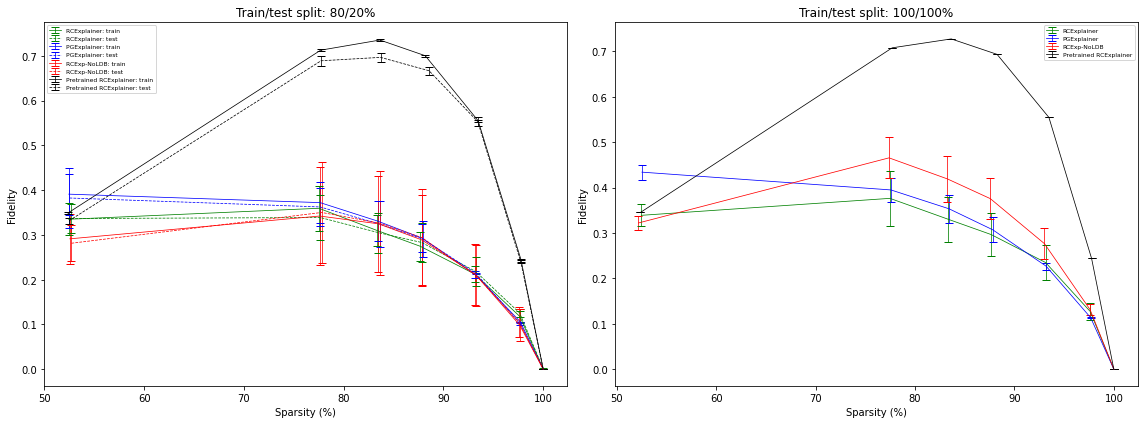

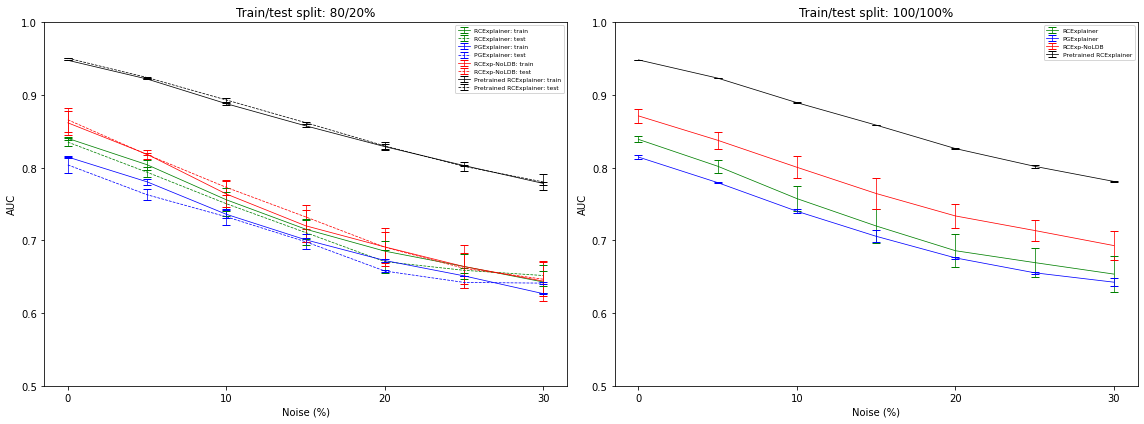

In [7]:
from plot_graphs import plot_main

plot_main(results_dir, 'fidelity', threshold=0, figsize=(16,6))
plot_main(results_dir, 'noise', figsize=(16,6))

### Efficency

In [6]:
with open("timing_result.txt", "r") as f:
    print(f.readline())

Average execution time (in seconds) 0.00423472332762796 std: 0.000177721967923896


# MNISTSuperPixel

In [6]:
import sys
sys.path.append('./packages/gcn_interpretation/gnn-model-explainer')
sys.path.append('./packages/ldbExtraction')

from explainer_main import main
from argparse import ArgumentParser
import json
import os
os.environ["WANDB_MODE"] = "offline"  # Use wandb logging in offline mode

import os
from train import pyg_task as gcn_main
from train import arg_parse

OSError: /home/tvorden/anaconda3/envs/FACT/lib/python3.8/site-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c106detail12infer_schema20make_function_schemaENS_8ArrayRefINS1_11ArgumentDefEEES4_

### Downloading a pretrained GCN
The GCN can either be trained here or downloaded.

In [7]:
!gdown --id 1mYzpSdn2FXCk9mwLSPkqkopBphoJtT6j
!mv MNISTSuperpixels_base_h100_o30_BASE.pth.tar ./ckpt/MNISTSuperpixels_base_h100_o30.pth.tar

NameError: name 'TRAIN' is not defined

### Training the GCN on MNISTSuperpixels

In [8]:
prog_args = arg_parse("")
prog_args.bmname = "MNISTSuperpixels"
prog_args.gpu = True
prog_args.datadir = "data"

prog_args.num_gc_layers = 4
prog_args.num_classes = 10
prog_args.hidden_dim = 100
prog_args.output_dim = 30

prog_args.num_epochs = 1
gcn_main(prog_args)

NameError: name 'TRAIN' is not defined

### Training RCExplainer

In [2]:
import configs

prog_args = configs.arg_parse("")
prog_args.bmname = "MNISTSuperpixels"
prog_args.gpu = False
prog_args.datadir = "data"
prog_args.num_classes = 10
prog_args.graph_mode = True
prog_args.explainer_method = "rcexplainer"
prog_args.ckptdir = "./ckpt"
prog_args.multigraph_class = 0
prog_args.prefix = "rcexp_MNISTSuperpixel"
prog_args.lr = 0.001
prog_args.size_c = 0.001
prog_args.ent_c = 8.0
prog_args.boundary_c = 3
prog_args.inverse_boundary_c = 12
prog_args.bloss_version = "sigmoid"
prog_args.train_data_sparsity = 1

prog_args.num_gc_layers = 4
prog_args.hidden_dim = 100
prog_args.output_dim = 30

prog_args.num_epochs = 1

_ = main(prog_args)

Using CPU
loading model
./ckpt/MNISTSuperpixels_base_h100_o30.pth.tar
=> loading checkpoint './ckpt/MNISTSuperpixels_base_h100_o30.pth.tar'
Loaded model from ./ckpt
input dim:  1 ; num classes:  10
Method:  base
Graph indices for label  0  : 
Dataset bundeled with model: self.adj.shape torch.Size([1001, 75, 75])
Val data in rceplainer: 100
Val data in rceplainer: 100
NOTE: Rules already extracted
Using file ./data/rule_dict_MNISTSuperpixel.pickle
log dir already exists and will be overwritten


Training


100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.06s/it]

epoch:  0 ; loss:  13.651668548583984
Reporting statistics
Samples: 99
Edge fidelity prediction change: [1.         1.         1.         0.98989899 0.94949495 0.73737374
 0.4040404  0.1010101  0.        ]
 Edge fidelity confidence change: [0.35521112 0.36907885 0.3339609  0.28486362 0.21451278 0.12974939
 0.05901644 0.00851043 0.        ] for sparsity [0.         0.50054562 0.75075445 0.80080933 0.85070119 0.90074919
 0.95071269 0.99082682 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5005456203162068,0.7507544539191506,0.8008093292062933,0.8507011912085793,0.9007491908892237,0.9507126922559257,0.990826818076047,1.0,
Fidelity, 0.3552111161477638,0.3690788544187642,0.33396089754321356,0.2848636232542269,0.21451278045924024,0.1297493933728247,0.0590164369404918,0.008510426890970481,0.0,



([], [])

### Evaluating RCExplainer

In [ ]:

prog_args.eval = True
prog_args.noise = True
prog_args.exp_path = "ckpt/rcexp_MNISTSuperpixel_seed_0_sparsity_1_logdir_RIGHT_HYPERPARAMS/rcexp_MNISTSuperpixelexplainer_MNISTSuperpixels_seed_0_sparsity_1_RIGHT_HYPERPARMS.pth.tar"

rcexp_result = main(prog_args)

Using CPU
loading model
./ckpt/MNISTSuperpixels_base_h100_o30.pth.tar
=> loading checkpoint './ckpt/MNISTSuperpixels_base_h100_o30.pth.tar'
Loaded model from ./ckpt
input dim:  1 ; num classes:  10
Method:  base
Graph indices for label  0  : 
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original


100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [06:48<00:00,  4.12s/it]


Reporting statistics
Samples: 99
Edge fidelity prediction change: [1.         1.         0.58585859 0.39393939 0.26262626 0.1010101
 0.08080808 0.1010101  0.        ]
 Edge fidelity confidence change: [ 0.35521112  0.35170916  0.11598222  0.06158603  0.01925245 -0.01586693
 -0.02656634 -0.00931477  0.        ] for sparsity [0.         0.5006314  0.75071555 0.80090609 0.8506453  0.90071233
 0.95075149 0.99082884 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5006314022372468,0.7507155549646628,0.8009060946377841,0.8506452977055251,0.9007123347484705,0.950751487654869,0.9908288422257009,1.0,
Fidelity, 0.3552111161477638,0.3517091640017249,0.11598222153355377,0.06158602809665179,0.0192524537895665,-0.015866929684022462,-0.02656634483072493,-0.00931477320916725,0.0,

AUC computation:
 Number of false negatives found: 0
 Total number of edges in data:   656475
Evaluted [495, 0, 0, 0, 0, 0, 0, 0, 0, 0] samples with noise 0
Average adj diff: [0.]
Average feat diff: [0.]
Average noise diff: [0

 68%|█████████████████████████████████████████████████████▍                         | 67/99 [09:29<03:13,  6.05s/it]

In [ ]:
# get test-set results
rc_SPARSITY, rc_FIDELITY, NOISE_VALS, rc_AUC = rcexp_result[1] 

### Training PGExplainer

In [8]:
import configs


prog_args = configs.arg_parse("")
prog_args.bmname = "MNISTSuperpixels"
prog_args.gpu = False
prog_args.datadir = "data"
prog_args.num_classes = 10
prog_args.graph_mode = True
prog_args.explainer_method = "pgexplainer"
prog_args.ckptdir = "./ckpt"
prog_args.multigraph_class = 0
prog_args.prefix = "pgexp_MNISTSuperpixel"
prog_args.lr = 0.001
prog_args.size_c = 0.001
prog_args.ent_c = 8.0
prog_args.boundary_c = 3
prog_args.inverse_boundary_c = 12
prog_args.bloss_version = "sigmoid"
prog_args.train_data_sparsity = 1

prog_args.num_gc_layers = 4
prog_args.hidden_dim = 100
prog_args.output_dim = 30

prog_args.num_epochs = 1

_ = main(prog_args)

Using CPU
loading model
./ckpt/MNISTSuperpixels_base_h100_o30.pth.tar
=> loading checkpoint './ckpt/MNISTSuperpixels_base_h100_o30.pth.tar'
Loaded model from ./ckpt
input dim:  1 ; num classes:  10
Method:  base
Graph indices for label  0  : 


100%|█████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.96s/it]

epoch:  0 ; loss:  1590.9735107421875
Average mask density: 0.5035786864306597
Variance:  0.04892888085771712
Flips:  99.0
pos diff: 0.36899374259842765, k: 8.0, topk inv diff: 0.010590309145474675
topk inv Flips:  87.0
Incorrect preds:  54.0
Total graphs optimized:  99
Reporting statistics
Samples: 99
Edge fidelity prediction change: [1.         1.         1.         0.98989899 0.94949495 0.73737374
 0.4040404  0.1010101  0.        ]
 Edge fidelity confidence change: [0.35521112 0.36907885 0.3339609  0.28486362 0.21451278 0.12974939
 0.05901644 0.00851043 0.        ] for sparsity [0.         0.50054562 0.75075445 0.80080933 0.85070119 0.90074919
 0.95071269 0.99082682 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5005456203162068,0.7507544539191506,0.8008093292062933,0.8507011912085793,0.9007491908892237,0.9507126922559257,0.990826818076047,1.0,
Fidelity, 0.3552111161477638,0.3690788544187642,0.33396089754321356,0.2848636232542269,0.21451278045924024,0.1297493933728247,0.059016436940

([], [])

In [11]:

prog_args.eval = True
prog_args.noise = True
prog_args.exp_path = "./ckpt/pgexp_MNISTSuperpixel_seed_0_sparsity_1_logdir_RIGHT_HYPERPARAMS/pgexp_MNISTSuperpixelexplainer_MNISTSuperpixels_seed_0_sparsity_1_RIGHT_HYPERPARAMS.pth.tar"

pgexp_result  = main(prog_args)

Using CPU
loading model
./ckpt/MNISTSuperpixels_base_h100_o30.pth.tar
=> loading checkpoint './ckpt/MNISTSuperpixels_base_h100_o30.pth.tar'
Loaded model from ./ckpt
input dim:  1 ; num classes:  10
Method:  base
Graph indices for label  0  : 
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original
Using AUC Metric: original


100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [06:36<00:00,  4.01s/it]


Reporting statistics
Samples: 99
Edge fidelity prediction change: [1.         1.         0.58585859 0.39393939 0.26262626 0.1010101
 0.08080808 0.1010101  0.        ]
 Edge fidelity confidence change: [ 0.35521112  0.35170916  0.11598222  0.06158603  0.01925245 -0.01586693
 -0.02656634 -0.00931477  0.        ] for sparsity [0.         0.5006314  0.75071555 0.80090609 0.8506453  0.90071233
 0.95075149 0.99082884 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5006314022372468,0.7507155549646628,0.8009060946377841,0.8506452977055251,0.9007123347484705,0.950751487654869,0.9908288422257009,1.0,
Fidelity, 0.3552111161477638,0.3517091640017249,0.11598222153355377,0.06158602809665179,0.0192524537895665,-0.015866929684022462,-0.02656634483072493,-0.00931477320916725,0.0,

AUC computation:
 Number of false negatives found: 0
 Total number of edges in data:   656475
Evaluted [495, 0, 0, 0, 0, 0, 0, 0, 0, 0] samples with noise 0
Average adj diff: [0.]
Average feat diff: [0.]
Average noise diff: [0

100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [06:39<00:00,  4.04s/it]


Reporting statistics
Samples: 99
Edge fidelity prediction change: [1.         1.         0.58585859 0.39393939 0.26262626 0.1010101
 0.08080808 0.1010101  0.        ]
 Edge fidelity confidence change: [ 0.35521112  0.35170916  0.11598222  0.06158603  0.01925245 -0.01586693
 -0.02656634 -0.00931477  0.        ] for sparsity [0.         0.5006314  0.75071555 0.80090609 0.8506453  0.90071233
 0.95075149 0.99082884 1.        ]
Mask density: [0.]
Sparsity, 0.0,0.5006314022372468,0.7507155549646628,0.8009060946377841,0.8506452977055251,0.9007123347484705,0.950751487654869,0.9908288422257009,1.0,
Fidelity, 0.3552111161477638,0.3517091640017249,0.11598222153355377,0.06158602809665179,0.0192524537895665,-0.015866929684022462,-0.02656634483072493,-0.00931477320916725,0.0,

AUC computation:
 Number of false negatives found: 0
 Total number of edges in data:   656475
Evaluted [495, 0, 0, 0, 0, 0, 0, 0, 0, 0] samples with noise 0
Average adj diff: [0.]
Average feat diff: [0.]
Average noise diff: [0

In [23]:
# get test-set results
pg_SPARSITY, pg_FIDELITY, NOISE_VALS, pg_AUC = = pgexp_result[1] 

NameError: name 'pgexp_result_test' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

S = 3
fig, axs = plt.subplots(1,2, figsize=(S*3,S),dpi=200)
axs[0].set_title("Fidelity performance")

axs[0].plot(np.array(rc_SPARSITY) * 100, rc_FIDELITY,  label="RCExplainer", color="green")
axs[0].plot(np.array(pg_SPARSITY) * 100, pg_FIDELITY,  alpha=.7,  label="PGExplainer", color="blue", )

axs[0].set_xlim(70, 100)
axs[0].set_xlabel("Sparsity (%)")
axs[0].set_ylabel("Fidelity")


axs[1].set_title("Noise robustness")

NOISE_VALS = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]) * 100
axs[1].plot(NOISE_VALS, rc_AUC, label="RCExplainer", color="green")
axs[1].plot(NOISE_VALS, pg_AUC, alpha=.7, label="PGExplainer", color="blue")

axs[1].set_xlabel("Noise (%)")
axs[1].set_ylabel("AUC")
axs[0].legend(loc="lower left")
axs[1].legend()
plt.tight_layout()

plt.show()